In [1]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

# Importing the train test split function
from sklearn.model_selection import train_test_split

In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

data = pd.read_csv("data_cleaned.csv")
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.shape

(891, 25)

In [5]:
#seperating independent and dependent variables
x=data.drop(['Survived'],axis =1)
y=data["Survived"]

In [6]:
x.shape

(891, 24)

In [7]:
y.shape

(891,)

In [8]:
a=data.iloc[:,1:]
b=data.iloc[:,0]
a.shape ,b.shape

((891, 24), (891,))

In [9]:
x

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,38.000000,71.2833,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.000000,7.9250,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,35.000000,53.1000,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.000000,8.0500,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
887,19.000000,30.0000,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
888,29.699118,23.4500,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
889,26.000000,30.0000,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [10]:
#Scaling the data (Using MinMax Scaler)
mms=MinMaxScaler()
x_scaled=mms.fit_transform(x)
x_scaled

array([[0.27117366, 0.01415106, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.4722292 , 0.13913574, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32143755, 0.01546857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.36792055, 0.04577135, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32143755, 0.0585561 , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.39683338, 0.01512699, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [11]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.367921,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,stratify=y)

In [13]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((668, 24), (223, 24), (668,), (223,))

In [14]:
model=KNN(n_neighbors=5)

In [15]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
test_predicts=model.predict(x_test)

In [17]:
score=f1_score(test_predicts,y_test)

In [18]:
print("The f1 score :" ,score)

The f1 score : 0.6826347305389222


Elbow For Classifier

In [19]:
def elbow(K):
    #initiating empty list
    test_error=[]
    
    #training model for evey value of k
    for i in K:
        model=KNN(n_neighbors=i)
        model.fit(x_train,y_train)
        # Appending F1 scores to empty list claculated using the predictions
        temp=model.predict(x_test)
        temp=f1_score(temp,y_test)
        error=1-temp
        test_error.append(error)
    return test_error

In [20]:
k=range(6,20,2)
#calling and storing
test=elbow(k)

In [21]:
test

[0.33333333333333326,
 0.2993630573248408,
 0.29999999999999993,
 0.2962962962962963,
 0.2962962962962963,
 0.29999999999999993,
 0.3125]

Text(0.5, 1.0, 'Elbow Curve for test')

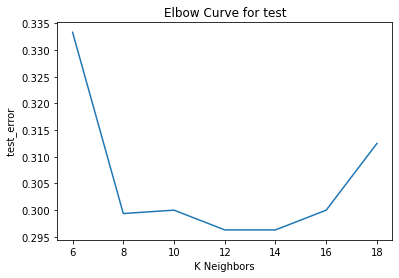

In [22]:
#ploting the curves 
plt.plot(k,test)
plt.xlabel(" K Neighbors ")
plt.ylabel(" test_error ")
plt.title("Elbow Curve for test")

In [23]:
# Creating instance of KNN
model = KNN(n_neighbors = 12)

# Fitting the model
model.fit(x_train, y_train)

# Predicting over the Train Set and calculating F1
test_predict = model.predict(x_test)
k = f1_score(test_predict, y_test)
print('Test F1 Score    ', k )

Test F1 Score     0.7037037037037037
